In [1]:
import os
os.environ['SPS_HOME'] = '/Users/annalena/Documents/GitHub/fsps'
#os.environ['SPS_HOME'] = '/export/home/aschaibl/fsps'
#os.environ['SPS_HOME'] = '/home/annalena/sps_fsps'

# Bruzual&Charlot

In [2]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import HDF5SSPGrid
from rubix.utils import get_config

config = get_config("../rubix/config/rubix_config.yml")

ssp_bc = HDF5SSPGrid.from_file(config["ssp"]["templates"]["BruzualCharlot2003"], file_location="../rubix/spectra/ssp/templates")

2025-03-14 11:26:41,908 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-03-14 11:26:41,908 - rubix - INFO - Rubix version: 0.0.post400+gee789d5.d20250306


In [3]:
ssp_bc.wavelength

Array([   91.,    94.,    96.,    98.,   100.,   102.,   104.,   106.,
         108.,   110.,   114.,   118.,   121.,   125.,   127.,   128.,
         131.,   132.,   134.,   137.,   140.,   143.,   147.,   151.,
         155.,   159.,   162.,   166.,   170.,   173.,   177.,   180.,
         182.,   186.,   191.,   194.,   198.,   202.,   205.,   210.,
         216.,   220.,   223.,   227.,   230.,   234.,   240.,   246.,
         252.,   257.,   260.,   264.,   269.,   274.,   279.,   284.,
         290.,   296.,   301.,   308.,   318.,   328.,   338.,   348.,
         357.,   366.,   375.,   385.,   395.,   405.,   414.,   422.,
         430.,   441.,   451.,   460.,   470.,   480.,   490.,   500.,
         506.,   512.,   520.,   530.,   540.,   550.,   560.,   570.,
         580.,   590.,   600.,   610.,   620.,   630.,   640.,   650.,
         658.,   665.,   675.,   685.,   695.,   705.,   716.,   726.,
         735.,   745.,   755.,   765.,   775.,   785.,   795.,   805.,
      

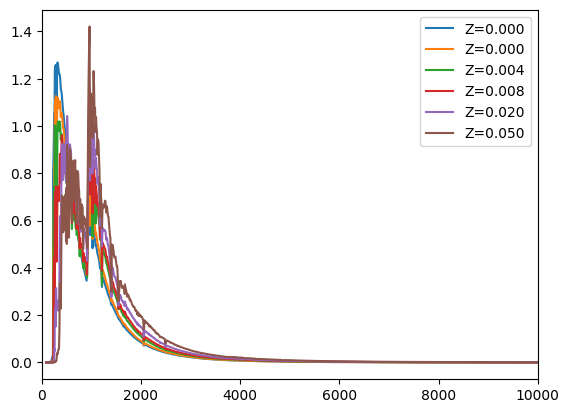

In [4]:
import matplotlib.pyplot as plt

# NBVAL_SKIP
for i in range(len(ssp_bc.metallicity)):
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[i][0], label=r'Z=%0.3f'%ssp_bc.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,10000)
plt.legend()

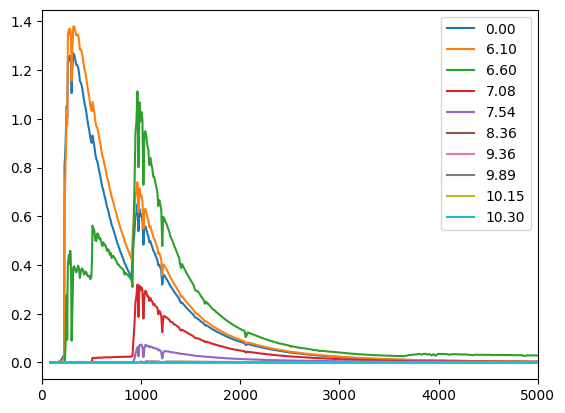

In [5]:
import numpy as np
ages = np.linspace(0,len(ssp_bc.age),10)
for age in ages:
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[0][int(age)], label='%.2f'%ssp_bc.age[int(age)])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

# MaStar

In [6]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp_mastar = pyPipe3DSSPGrid.from_file(config["ssp"]["templates"]["Mastar_CB19_SLOG_1_5"], file_location="../rubix/spectra/ssp/templates")

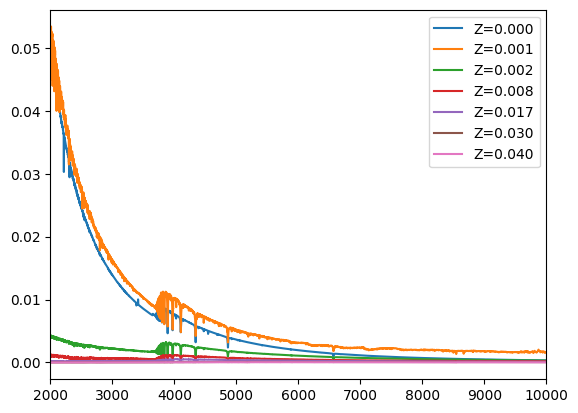

In [7]:
# NBVAL_SKIP
for i in range(len(ssp_mastar.metallicity)):
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[i][0], label=r'Z=%0.3f'%ssp_mastar.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

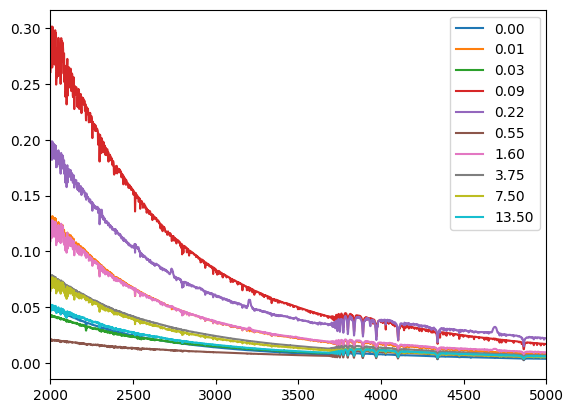

In [8]:
ages = np.linspace(0,len(ssp_mastar.age),10)
for age in ages:
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[0][int(age)], label='%.2f'%(ssp_mastar.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

In [9]:
ssp_mastar.age[-3]

Array(10.25, dtype=float32)

In [10]:
ssp_mastar.metallicity[0]

Array(0.0001, dtype=float32)

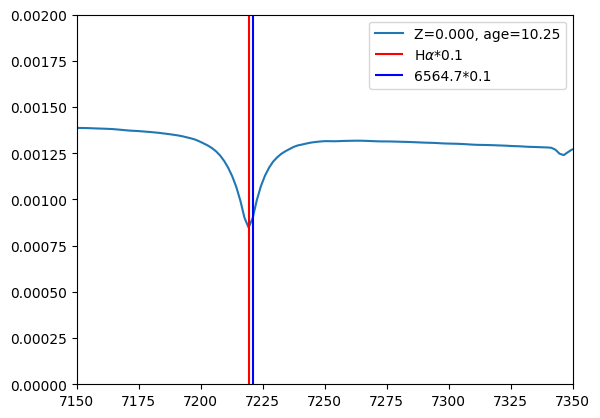

In [11]:
plt.plot(ssp_mastar.wavelength*1.1,ssp_mastar.flux[0][-3], label=r'Z=%0.3f, age=%0.2f'%(ssp_mastar.metallicity[0],ssp_mastar.age[-3]))
plt.vlines(6563*1.1,0,0.002, colors='r', label=r'H$\alpha$*0.1')
plt.vlines(6564.7*1.1,0,0.002, colors='b', label=r'6564.7*0.1')
plt.xlim(7150,7350)
plt.ylim(0,0.002)
plt.legend()

# FSPS

In [12]:
from rubix.spectra.ssp.factory import get_ssp_template
ssp_fsps = get_ssp_template("FSPS")

2025-03-14 11:26:43,626 - rubix - INFO - [SSPModels] File /Users/annalena/Documents/GitHub/rubix/rubix/spectra/ssp/templates/fsps.h5 not found. Downloading it from load_from_file
2025-03-14 11:26:43,627 - rubix - ERROR - [SSPModels] Error: Invalid URL 'load_from_file/fsps.h5': No scheme supplied. Perhaps you meant https://load_from_file/fsps.h5?
2025-03-14 11:26:43,627 - rubix - WARNING - The FSPS SSP template file is not found. Running FSPS to generate SSP templates.


...retrieving zmet = 1 of 12
...retrieving zmet = 2 of 12
...retrieving zmet = 3 of 12
...retrieving zmet = 4 of 12
...retrieving zmet = 5 of 12
...retrieving zmet = 6 of 12
...retrieving zmet = 7 of 12
...retrieving zmet = 8 of 12
...retrieving zmet = 9 of 12
...retrieving zmet = 10 of 12
...retrieving zmet = 11 of 12
...retrieving zmet = 12 of 12


2025-03-14 11:28:51,644 - rubix - INFO - Writing created FSPS data to disk under the following path: /Users/annalena/Documents/GitHub/rubix/rubix/spectra/ssp/templates/fsps.h5.


In [13]:
ssp_fsps.wavelength

Array([8.950e+01, 9.250e+01, 9.450e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08], dtype=float32)

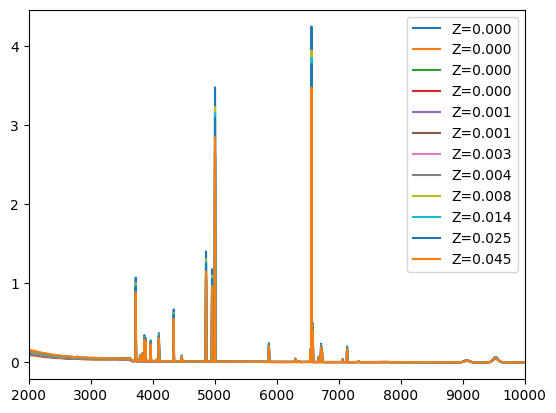

In [14]:
# NBVAL_SKIP
for i in range(len(ssp_fsps.metallicity)):
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[i][0], label=r'Z=%0.3f'%ssp_fsps.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

In [15]:
metallicity = 1.4e-4
metallicity_index = 1
age = 10
age_index = 100

In [16]:
print(ssp_fsps.wavelength[1000], ssp_fsps.wavelength[1001])

4175.577 4176.477


In [17]:
ssp_fsps.wavelength

Array([8.950e+01, 9.250e+01, 9.450e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08], dtype=float32)

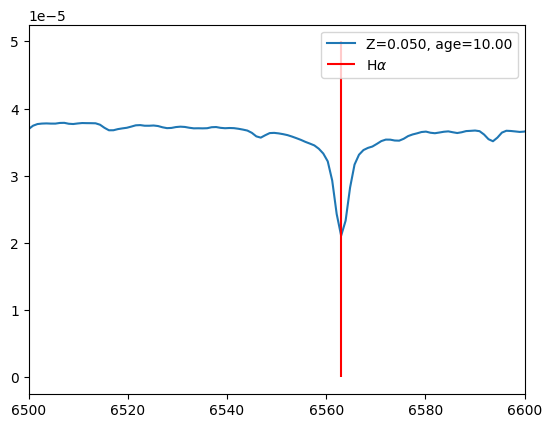

In [29]:
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[metallicity_index][age_index], label=r'Z=%0.3f, age=%0.2f'%(metallicity,ssp_fsps.age[age_index]))
plt.vlines(6563,0,5e-5, colors='r', label=r'H$\alpha$')
plt.xlim(6500,6600)
plt.legend()

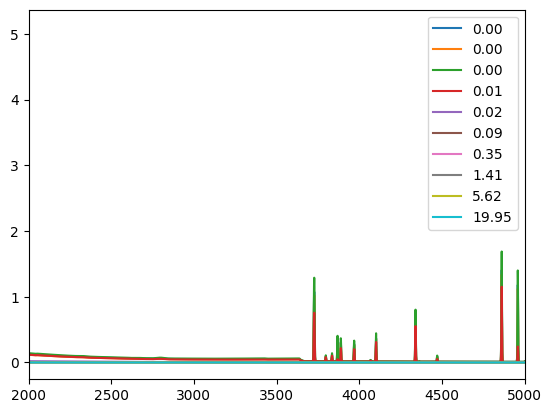

In [19]:
ages = np.linspace(0,len(ssp_fsps.age),10)
for age in ages:
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[0][int(age)], label='%.2f'%(ssp_fsps.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

# Comparison of the SSP templates

In [20]:
print(ssp_bc.age[180])
print(ssp_mastar.age[36])
print(ssp_fsps.age[100])

10.0
10.25
10.0


In [21]:
print(ssp_bc.metallicity[3])
print(ssp_mastar.metallicity[3])
print(ssp_fsps.metallicity[8])

0.008
0.008
0.007985248


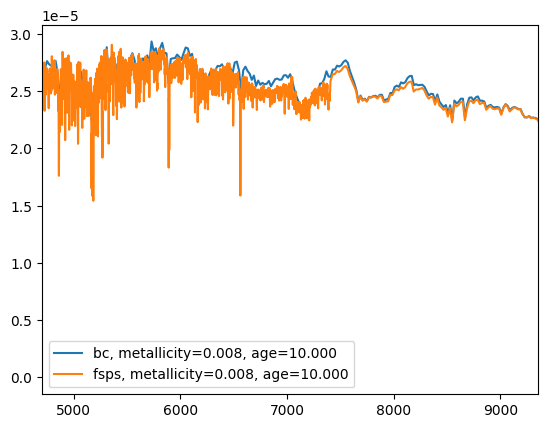

In [22]:
plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][180], label=f'bc, metallicity={ssp_bc.metallicity[3]:.3f}, age={ssp_bc.age[180]:.3f}')
#plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[3][36]/(ssp_mastar.wavelength**2)*299792458, label='mastar')
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][100], label=f'fsps, metallicity={ssp_fsps.metallicity[8]:.3f}, age={ssp_fsps.age[100]:.3f}')

#plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][0], label='bc 0')
#plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][0], label='fsps 0')

#plt.xlim(1000, 20000)
plt.xlim(4700.15, 9351.4)
#plt.ylim(0, 0.01)
plt.legend()
plt.savefig("./output/ssp_comparison_bc_fsps_10_008_large.png")

In [23]:
import numpy as np

def find_closest_index(array, value):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

In [24]:
ssp_bc.metallicity

Array([0.0001, 0.0004, 0.004 , 0.008 , 0.02  , 0.05  ], dtype=float32)

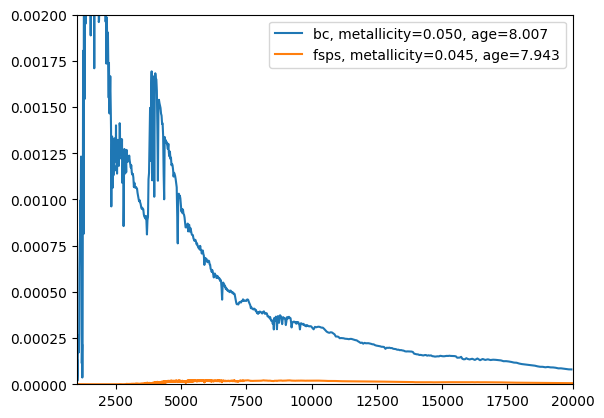

In [25]:
metallicity = 0.05
age = 8.0

index_metallicity_bc = find_closest_index(ssp_bc.metallicity, metallicity)
index_age_bc = find_closest_index(ssp_bc.age, age)
index_metallicity_fsps = find_closest_index(ssp_fsps.metallicity, metallicity)
index_age_fsps = find_closest_index(ssp_fsps.age, age)

plt.plot(ssp_bc.wavelength,ssp_bc.flux[index_metallicity_bc][index_age_bc], label=f'bc, metallicity={ssp_bc.metallicity[index_metallicity_bc]:.3f}, age={ssp_bc.age[index_age_bc]:.3f}')    
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[index_metallicity_fsps][index_age_fsps], label=f'fsps, metallicity={ssp_fsps.metallicity[index_metallicity_fsps]:.3f}, age={ssp_fsps.age[index_age_fsps]:.3f}')

#plt.xlim(4700.15, 9351.4)
plt.xlim(1000, 20000)
plt.ylim(0, 0.002)
plt.legend()
plt.savefig("./output/ssp_comparison_bc_fsps_8_05.png")

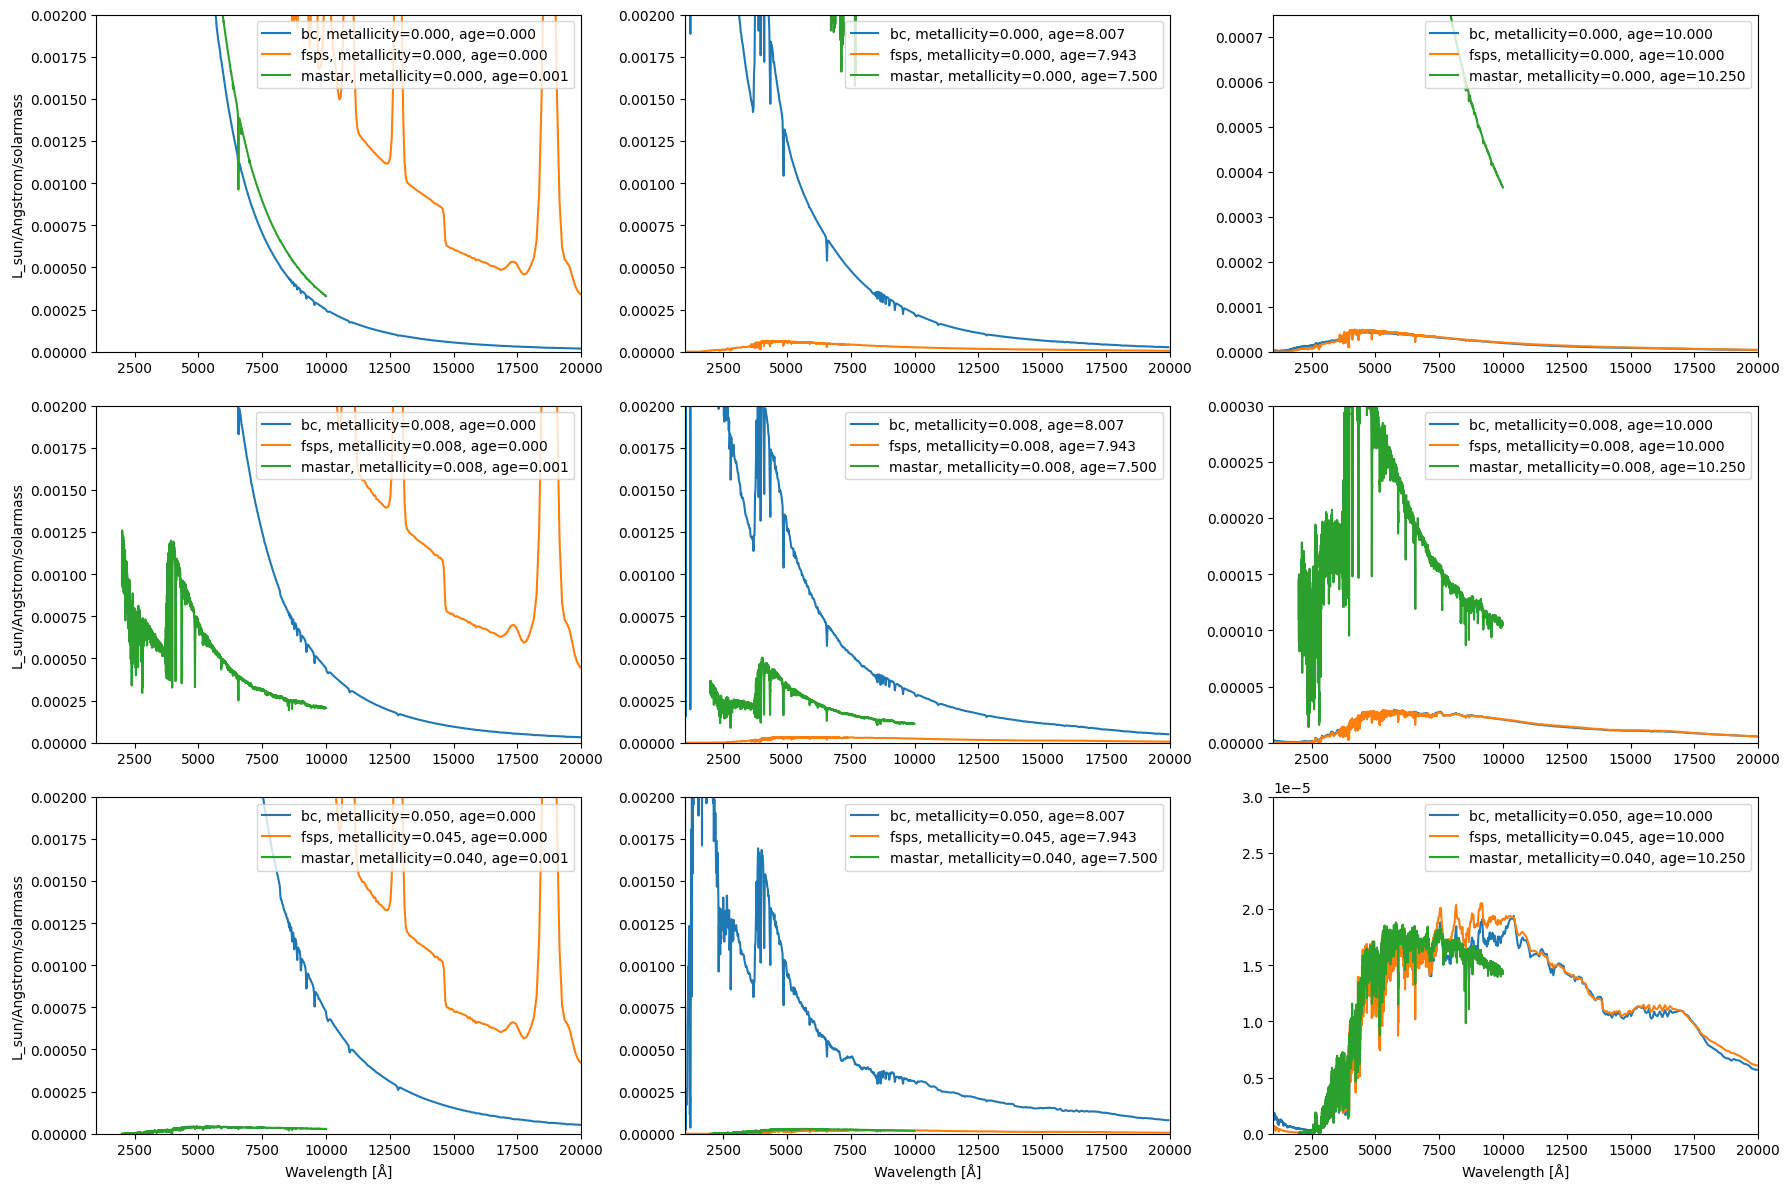

In [26]:
import matplotlib.pyplot as plt

# Define the metallicity and age values for the grid
metallicities = [1e-4, 8e-3, 5e-2]
ages = [0, 8, 10]

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Loop over the grid and plot the data
for i, metallicity in enumerate(metallicities):
    for j, age in enumerate(ages):
        ax = axes[i, j]
        
        # Find the closest indices for the current metallicity and age
        index_metallicity_bc = find_closest_index(ssp_bc.metallicity, metallicity)
        index_age_bc = find_closest_index(ssp_bc.age, age)
        index_metallicity_fsps = find_closest_index(ssp_fsps.metallicity, metallicity)
        index_age_fsps = find_closest_index(ssp_fsps.age, age)
        index_metallicity_mastar = find_closest_index(ssp_mastar.metallicity, metallicity)
        index_age_mastar = find_closest_index(ssp_mastar.age, age)
        
        # Plot the data for the current metallicity and age
        ax.plot(ssp_bc.wavelength, ssp_bc.flux[index_metallicity_bc][index_age_bc], label=f'bc, metallicity={ssp_bc.metallicity[index_metallicity_bc]:.3f}, age={ssp_bc.age[index_age_bc]:.3f}')    
        ax.plot(ssp_fsps.wavelength, ssp_fsps.flux[index_metallicity_fsps][index_age_fsps], label=f'fsps, metallicity={ssp_fsps.metallicity[index_metallicity_fsps]:.3f}, age={ssp_fsps.age[index_age_fsps]:.3f}')
        ax.plot(ssp_mastar.wavelength, ssp_mastar.flux[index_metallicity_mastar][index_age_mastar], label=f'mastar, metallicity={ssp_mastar.metallicity[index_metallicity_mastar]:.3f}, age={ssp_mastar.age[index_age_mastar]:.3f}')
        
        # Set plot limits and labels
        ax.set_xlim(1000, 20000)
        if j == 2 and i == 2:
            ax.set_ylim(0, 0.00003)
        elif j == 2 and i == 1:
            ax.set_ylim(0, 0.0003)
        elif j == 2:
            ax.set_ylim(0, 0.00075)
        else:
            ax.set_ylim(0, 0.002)
        if i == 2:
            ax.set_xlabel('Wavelength [Å]')
        if j == 0:
            ax.set_ylabel('L_sun/Angstrom/solarmass')
        ax.legend(loc='upper right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("./output/ssp_comparison_grid.png")
plt.show()